# Analyse des données liées au COVID-19 en France

## Importation des modules

In [37]:
import pandas as pd 

In [38]:
import matplotlib.pyplot as plt 
%matplotlib inline

In [39]:
import requests

## Récupération du fichier .csv

In [40]:
# Récupération du fichier .csv à partir d'une URL stable
url = "https://www.data.gouv.fr/fr/datasets/r/63352e38-d353-4b54-bfd1-f1b3ee1cabd7"

req = requests.get(url) # Envoi de la requête

if req.status_code == 200:
    print("LINK OK")
else:
    print(req.status_code)

url_content = req.content # Binary content
csv_file = open('cov.csv', 'wb')

csv_file.write(url_content)
csv_file.close()

cov = pd.read_csv('cov.csv', sep=";")

LINK OK


## Exploration des données

In [41]:
# Affichage des premières lignes
cov.head()

,dep,sexe,jour,hosp,rea,rad,dc
0,01,0,2020-03-18,2,0,1,0
1,01,1,2020-03-18,1,0,1,0
2,01,2,2020-03-18,1,0,0,0
3,02,0,2020-03-18,41,10,18,11
4,02,1,2020-03-18,19,4,11,6


In [42]:
# Affichage des dernières lignes
cov.tail()

,dep,sexe,jour,hosp,rea,rad,dc
75442,974,1,2020-11-21,46,8,296,20
75443,974,2,2020-11-21,39,7,296,23
75444,976,0,2020-11-21,11,5,505,34
75445,976,1,2020-11-21,6,2,242,21
75446,976,2,2020-11-21,5,3,257,13


In [43]:
# Description générale du dataset
cov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75447 entries, 0 to 75446
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   dep     75447 non-null  object
 1   sexe    75447 non-null  int64 
 2   jour    75447 non-null  object
 3   hosp    75447 non-null  int64 
 4   rea     75447 non-null  int64 
 5   rad     75447 non-null  int64 
 6   dc      75447 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 4.0+ MB


In [44]:
# Dimensions du dataset (lignes, colonnes)
cov.shape

(75447, 7)

Informations sur les colonnes :

dep = département (type 'str' et non 'int' car dep. Corse = 2A et 2B)

sexe = 0 : h/f | 1 : h | 2 : f

jour = date enregistrement

hosp = nombre d'hospitalisations

rea = nombre de patients en réanimation

rad = Nombre de personnes retournées à domicile

dc = Nombre de décès en milieu hospitalier


## Visualisation

### Tout le territoire

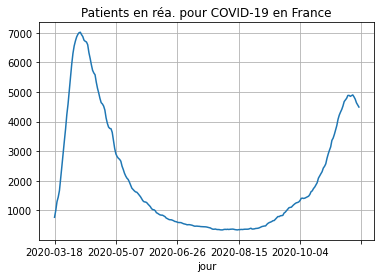

In [45]:
cov_0 = cov.loc[cov['sexe'] == 0]
cov_rea = cov_0.groupby("jour").rea.sum()
rea_graph = cov_rea.plot(grid=True, title="Patients en réa. pour COVID-19 en France")

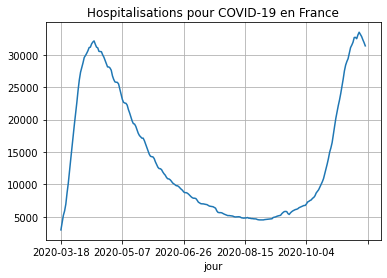

In [46]:
hosp_cov = cov_0.groupby("jour").hosp.sum()
hosp_graph = hosp_cov.plot(grid=True, title="Hospitalisations pour COVID-19 en France")

<AxesSubplot:title={'center':'Nombre de décès en milieu hospitalier\n suite à la COVID-19 en France'}, xlabel='jour'>

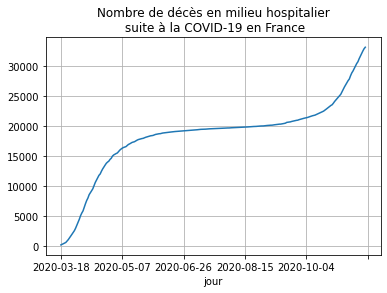

In [47]:
cov_dc = cov_0.groupby("jour").dc.sum()
cov_dc.plot(grid=True, title="Nombre de décès en milieu hospitalier\n suite à la COVID-19 en France")

<class 'matplotlib.axes._subplots.AxesSubplot'>


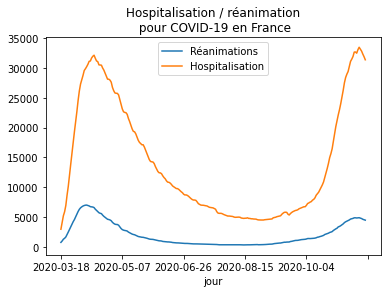

In [48]:
cov_rea.to_frame()
hosp_cov.to_frame()
rea_graph = cov_rea.plot(x="jour", y="rea")
hosp_graph = hosp_cov.plot(x="jour", y="hosp", title="Hospitalisation / réanimation\n pour COVID-19 en France")
hosp_graph.legend(["Réanimations", "Hospitalisation"])
print(type(hosp_graph))

### Par département

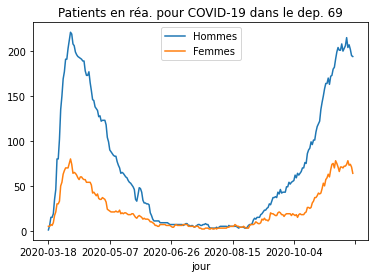

In [49]:
dep = "69" # Changer le département
cov_dep = cov.loc[cov['dep'] == dep]

cov_dep_0 = cov_dep.loc[cov_dep['sexe'] == 0] # Just H/F
cov_dep_1 = cov_dep.loc[cov_dep['sexe'] == 1] # Just H
cov_dep_2 = cov_dep.loc[cov_dep['sexe'] == 2] # Just F

title = f"Patients en réa. pour COVID-19 dans le dep. {dep}"

rea_1 = cov_dep_1.plot(x="jour", y="rea")
rea_2 = cov_dep_2.plot(x="jour", y="rea", ax=rea_1, grid=False, title = title)
rea_2.legend(["Hommes", "Femmes"])

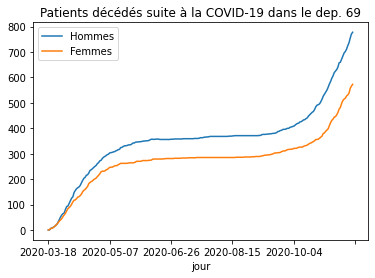

In [50]:
dep = "69"

cov_dep = cov.loc[cov['dep'] == dep]

cov_dep_0 = cov_dep.loc[cov_dep['sexe'] == 0] # Just H/F
cov_dep_1 = cov_dep.loc[cov_dep['sexe'] == 1] # Just H
cov_dep_2 = cov_dep.loc[cov_dep['sexe'] == 2] # Just F

title = f"Patients décédés suite à la COVID-19 dans le dep. {dep}"

dc_1 = cov_dep_1.plot(x="jour", y="dc")
dc_2 = cov_dep_2.plot(x="jour", y="dc", ax=dc_1, grid=False, title = title)
dc_2.legend(["Hommes", "Femmes"])